In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/capstone/dataset/dataset/train",target_size=(75,75),batch_size= 32, class_mode='binary')
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/capstone/dataset/dataset/test",target_size=(75,75),batch_size= 32, class_mode='binary')

Found 1420 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


# Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(75,75,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units= 512, kernel_initializer="uniform", activation="relu"))
model.add(Dense(units = 256, kernel_initializer="uniform", activation="relu"))
model.add(Dense(units = 1, kernel_initializer="uniform", activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<ipython-input-6-db0dae719eb7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(x_train, steps_per_epoch=40, epochs=60, validation_data=x_test, validation_steps=10)


Epoch 1/60
40/40 [==============================] - 527s 13s/step - loss: 0.7409 - accuracy: 0.4937 - val_loss: 0.6912 - val_accuracy: 0.6250
Epoch 2/60
40/40 [==============================] - 50s 1s/step - loss: 0.6909 - accuracy: 0.5246 - val_loss: 0.6789 - val_accuracy: 0.6875
Epoch 3/60
40/40 [==============================] - 35s 871ms/step - loss: 0.6369 - accuracy: 0.6222 - val_loss: 0.5887 - val_accuracy: 0.7094
Epoch 4/60
40/40 [==============================] - 35s 858ms/step - loss: 0.6158 - accuracy: 0.6397 - val_loss: 0.5790 - val_accuracy: 0.6969
Epoch 5/60
40/40 [==============================] - 36s 899ms/step - loss: 0.5896 - accuracy: 0.6643 - val_loss: 0.5050 - val_accuracy: 0.7469
Epoch 6/60
40/40 [==============================] - 35s 871ms/step - loss: 0.5703 - accuracy: 0.6857 - val_loss: 0.5111 - val_accuracy: 0.7250
Epoch 7/60
40/40 [==============================] - 34s 852ms/step - loss: 0.5553 - accuracy: 0.6929 - val_loss: 0.5698 - val_accuracy: 0.6750
Epo

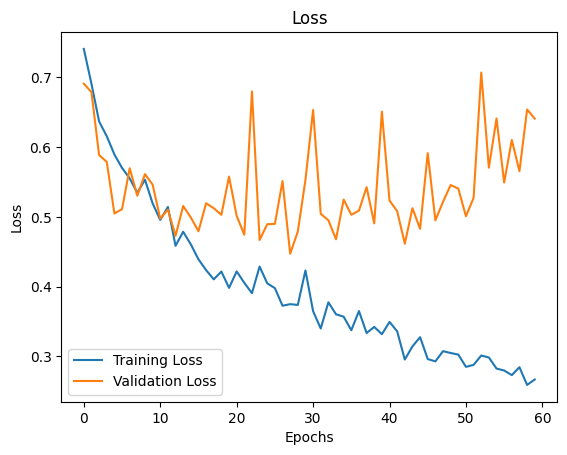

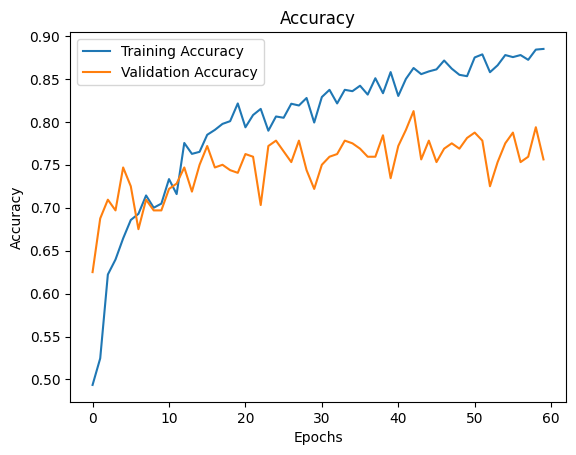

In [ ]:
import matplotlib.pyplot as plt

history = model.fit_generator(x_train, steps_per_epoch=20, epochs=60, validation_data=x_test, validation_steps=10)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np


# Load the test data
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/capstone/dataset/dataset/test",
                                          target_size=(75, 75),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=False)  # Important to keep shuffle=False

# Predict probabilities for the test data
y_pred_prob = model.predict(x_test)

y_pred = np.round(y_pred_prob).flatten()

y_true = x_test.labels

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Found 384 images belonging to 2 classes.
12/12 [==============================] - 2s 139ms/step
Accuracy: 0.7604166666666666
F1 Score: 0.7540106951871658
Precision: 0.8197674418604651
Recall: 0.698019801980198


In [ ]:
x_train.class_indices

{'Iceberg': 0, 'Ship': 1}

In [ ]:
from keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/drive/MyDrive/capstone/dataset/dataset/test/Iceberg/f178.png'
img = image.load_img(img_path, target_size=(75, 75))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]

# Predict the class probabilities
pred_prob = model.predict(img_array)[0][0]

# Convert predicted probability to class label
if pred_prob < 0.5:
    predicted_class = 'Ship'
else:
    predicted_class = 'Iceberg'

print("Predicted Class:", predicted_class)
print("Predicted Probability:", pred_prob)


1/1 [==============================] - 0s 79ms/step
Predicted Class: Iceberg
Predicted Probability: 0.8044114
